### Code and data from:
From https://www.youtube.com/watch?v=9yl6-HEY7_s

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
dtf = pd.read_csv('carprices.csv')
dtf

,car_model,mileage,sell_price,age_yrs
0,BMW_X5,69000,18000,6
1,BMW_X5,35000,34000,3
2,BMW_X5,57000,26100,5
3,BMW_X5,22500,40000,2
4,BMW_X5,46000,31500,4
5,Audi_A5,59000,29400,5
6,Audi_A5,52000,32000,5
7,Audi_A5,72000,19300,6
8,Audi_A5,91000,12000,8
9,Mercedez_Benz_C_class,67000,22000,6


### Explore normality of independent variables. 

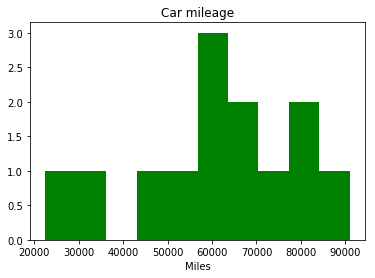

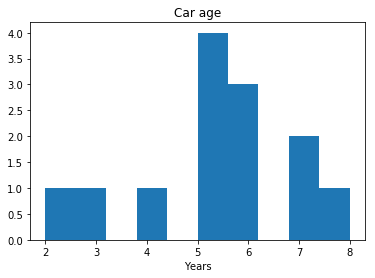

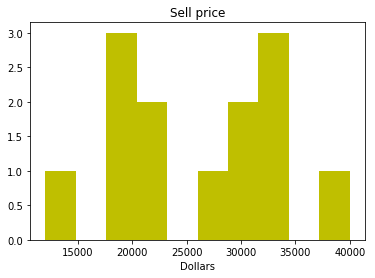

' Despite the small size of the data set, our data look kind of normal-ish distributed. '

In [56]:
plt.hist(dtf.mileage, color='g')
plt.title('Car mileage')
plt.xlabel('Miles')
plt.show()

plt.hist(dtf.age_yrs)
plt.title('Car age')
plt.xlabel('Years')
plt.show()

plt.hist(dtf.sell_price, color='y')
plt.title('Sell price')
plt.xlabel('Dollars')
plt.show()

""" Despite the small size of the data set, our data look kind of normal-ish distributed. """

###  Let's explore a bit further the normality using P-P Plots

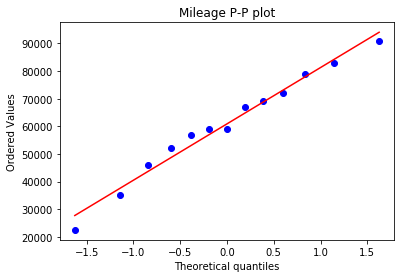

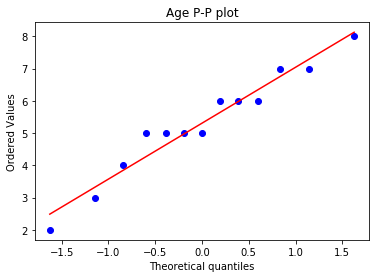

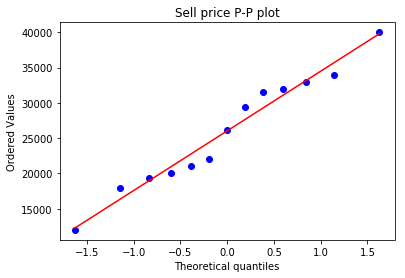

' Our data is distributed around the normality line, so it should be fine to assume normal distribution. '

In [82]:
import scipy.stats as stats
import pylab

stats.probplot(dtf.mileage, dist="norm", plot=pylab)
pylab.title('Mileage P-P plot')
pylab.show()


stats.probplot(dtf.age_yrs, dist="norm", plot=pylab)
pylab.title('Age P-P plot')
pylab.show()


stats.probplot(dtf.sell_price, dist="norm", plot=pylab)
pylab.title('Sell price P-P plot')
pylab.show()

""" Our data is distributed around the normality line, so it should be fine to assume normal distribution. """

###  Q-Q plots tell us the same story

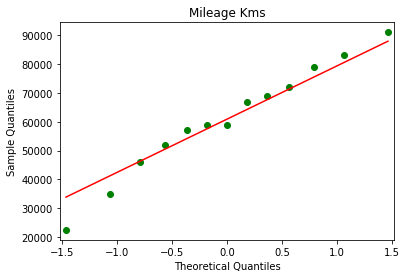

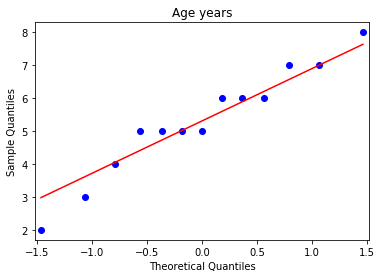

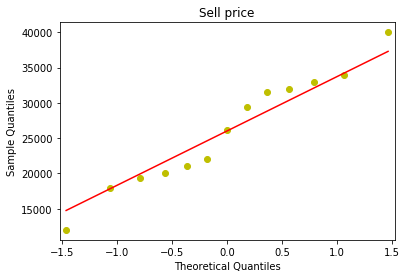

' Both QQ and PP plots show that the data resembles a normal distribution. '

In [80]:
from statsmodels.graphics.gofplots import qqplot
# from matplotlib import pyplot

qqplot(dtf.mileage, line='s', color='g')
plt.title('Mileage Kms')
plt.show()

qqplot(dtf.age_yrs, line='s', color='b')
plt.title('Age years')
plt.show()

qqplot(dtf.sell_price, line='s', color='y')
plt.title('Sell price')
plt.show()

""" Both QQ and PP plots show that the data resembles a normal distribution. """

### Explore linearity between independent and dependent variables. 

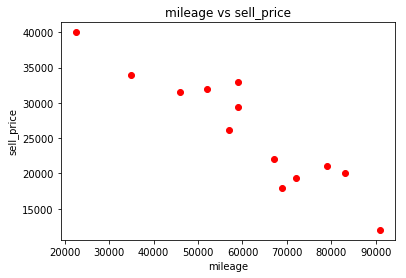

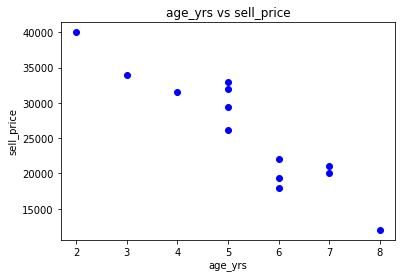

In [4]:
plt.scatter(dtf.mileage, dtf.sell_price, color='r')
plt.title('mileage vs sell_price')
plt.xlabel('mileage')
plt.ylabel('sell_price')
plt.show()

plt.scatter(dtf.age_yrs, dtf.sell_price, color='b')
plt.title('age_yrs vs sell_price')
plt.xlabel('age_yrs')
plt.ylabel('sell_price')
plt.show()

### Identifying colinearity between independent variables

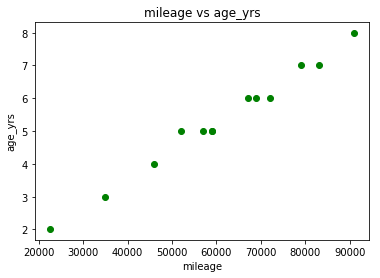

mileage vs age_yrs R^2 0.9869473989864677


In [4]:
""" There is high colinearity between mileage and age_yrs.
    We must avoid including both variables in the model. """ 
plt.scatter(dtf.mileage, dtf.age_yrs, color='g')
plt.title('mileage vs age_yrs')
plt.xlabel('mileage')
plt.ylabel('age_yrs')
plt.show()

mil_yrs_lrm = LinearRegression()
mil_yrs_lrm.fit(dtf[['mileage']].values, dtf.age_yrs)
r2 = mil_yrs_lrm.score(dtf[['mileage']].values, dtf.age_yrs)
print('mileage vs age_yrs R^2', r2)

### Computing Variance Inflation Factor (VIF)  for collinearity

In [5]:
"""
Implementation:
    https://etav.github.io/python/vif_factor_python.html (code below)

Interpretation: 
    https://www.displayr.com/variance-inflation-factors-vifs/
    A value of 1 means that the predictor is not correlated with other variables.
    The higher the value, the greater the correlation of the variable with other variables.
    Values of more than 4 or 5 are sometimes regarded as being moderate to high, with values
    of 10 or more being regarded as very high. These numbers are just rules of thumb ...
"""

""" Computing VIFs """
vif_dtf = dtf[['mileage', 'age_yrs', 'sell_price']].copy()
vif_res_dtf = pd.DataFrame()
vif_res_dtf["features"] = vif_dtf.columns
vif_res_dtf['vif_factors'] = [variance_inflation_factor(vif_dtf.values, i) for i in range(vif_dtf.shape[1])]
print(vif_res_dtf)

""" Both mileage and age_yrs have very large VIFs, we must avoid including them at the same time in a the model """

     features  vif_factors
0     mileage   919.259349
1     age_yrs   931.060353
2  sell_price     3.507936


' Both mileage and age_yrs have very large VIFs, we must avoid including them at the same time in a the model '

In [6]:
""" Creates dummy variables"""
dummies_dtf = pd.get_dummies(dtf.car_model)
print(dummies_dtf)

""" Removes one dummy variable to avoid dummy trap """
dummies_dtf = dummies_dtf.iloc[:,1:]
print(dummies_dtf)

    Audi_A5  BMW_X5  Mercedez_Benz_C_class
0         0       1                      0
1         0       1                      0
2         0       1                      0
3         0       1                      0
4         0       1                      0
5         1       0                      0
6         1       0                      0
7         1       0                      0
8         1       0                      0
9         0       0                      1
10        0       0                      1
11        0       0                      1
12        0       0                      1
    BMW_X5  Mercedez_Benz_C_class
0        1                      0
1        1                      0
2        1                      0
3        1                      0
4        1                      0
5        0                      0
6        0                      0
7        0                      0
8        0                      0
9        0                      1
10       0              

### Linear Regression: age_yrs vs sell price (w/ dummy vars)

In [7]:
""" Creates dataframe with years and dummy variables. """
Xyrs = pd.concat([dummies_dtf, dtf['age_yrs']], axis=1)

print(Xyrs.columns)

""" Single Linear Regression (plus dummy vars): age_yrs vs sell price.""" 
yrs_lrm = ()
yrs_lrm.fit(Xyrs, dtf.sell_price)
r2 = yrs_lrm.score(Xyrs, dtf.sell_price)

print('R^2 Xyrs:', r2)

""" TODO: Compute R^2-adj. with OLS class """ 

Index(['BMW_X5', 'Mercedez_Benz_C_class', 'age_yrs'], dtype='object')
R^2 Xyrs: 0.9315851574179888


' TODO: Compute R^2-adj. with OLS class '

### Linear Regression: mileage vs sell price  (w/ dummy vars)

In [8]:
""" Creates dataframe with mileage and dummy variables. """
Xmil = pd.concat([dummies_dtf, dtf['mileage']], axis=1)

print(Xmil.columns)

""" Single Linear Regression (plus dummy vars): mileage vs sell price.""" 
mil_lrm = LinearRegression()
mil_lrm.fit(Xmil, dtf.sell_price)
r2 = mil_lrm.score(Xmil, dtf.sell_price)

print('R^2 Xmil:', r2)

""" TODO: Compute R^2-adj. with OLS class """ 

Index(['BMW_X5', 'Mercedez_Benz_C_class', 'mileage'], dtype='object')
R^2 Xmil: 0.9407475372588112


' TODO: Compute R^2-adj. with OLS class '

In [9]:

print('Predictor Dummies + Mil. (no years):')
print(' R^2:', mil_lrm.score(Xmil, dtf.sell_price))
x = [[0,1,45000]]
print(' Mercedez (45K):', mil_lrm.predict(x))
x = [[1,0,86000]]
print(' BMW (86K):', mil_lrm.predict(x))

print('Predictor Dummies + Yrs. (no mileage):')
print(' R^2:', yrs_lrm.score(Xyrs, dtf.sell_price))
x = [[0,1,4]]
print(' Mercedez (4 yrs):', yrs_lrm.predict(x))
x = [[1,0,7]]
print(' BMW (7 yrs):', yrs_lrm.predict(x))

Predictor Dummies + Mil. (no years):
 R^2: 0.9407475372588112
 Mercedez (45K): [37033.10879215]
 BMW (86K): [10563.41990499]
Predictor Dummies + Yrs. (no mileage):
 R^2: 0.9315851574179888
 Mercedez (4 yrs): [36636.]
 BMW (7 yrs): [13072.]


### Lets anyway what happens building the model with both mileage and years (colinears)

In [10]:
""" Creates dataframe with mileage and dummy variables. """
X = pd.concat([dummies_dtf, dtf[['mileage', 'age_yrs']]], axis=1)

print(X.columns)

"""  Linear Regression (plus dummy vars): mileage & year  vs sell price.""" 
mil_lrm = LinearRegression()
mil_lrm.fit(X, dtf.sell_price)
r2 = mil_lrm.score(X, dtf.sell_price)

print('R^2:', r2)

""" TODO: Compute R^2-adj. with OLS class """ 

Index(['BMW_X5', 'Mercedez_Benz_C_class', 'mileage', 'age_yrs'], dtype='object')
R^2: 0.9417050937281083


' TODO: Compute R^2-adj. with OLS class '

In [11]:
print('Predictor Dummies + Mil & Years.:')
x = [[0,1,45000,4]]
print(' Mercedez (45K & 4yrs):', mil_lrm.predict(x))
x = [[1,0,86000,7]]
print(' BMW (86K & 7yrs):', mil_lrm.predict(x))
print('R^2:', r2)

Predictor Dummies + Mil & Years.:
 Mercedez (45K & 4yrs): [36991.31721062]
 BMW (86K & 7yrs): [11080.74313219]
R^2: 0.9417050937281083


### Using statsmodel

In [12]:
import statsmodels.formula.api as smf

data = pd.concat([dummies_dtf, dtf], axis=1).drop(['car_model'], axis=1)

lm1 = smf.ols(formula='sell_price ~ BMW_X5 + Mercedez_Benz_C_class + mileage + age_yrs', data=data)
# lm1 = smf.ols(formula='sell_price ~ BMW_X5 + Mercedez_Benz_C_class + mileage', data=data).fit()
# lm1 = smf.ols(formula='sell_price ~ BMW_X5 + Mercedez_Benz_C_class + age_yrs', data=data).fit()
results = lm1.fit()
print(results.summary())

''' Need to find out how to pass the correct array to slm.predict()'''

# predictions = results.predict([0 1 45000 4])
# print(predictions)

                            OLS Regression Results                            
Dep. Variable:             sell_price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     32.31
Date:                Sun, 13 Jan 2019   Prob (F-statistic):           5.50e-05
Time:                        07:43:38   Log-Likelihood:                -116.29
No. Observations:                  13   AIC:                             242.6
Df Residuals:                       8   BIC:                             245.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              5.652e+

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


' Need to find out how to pass the correct array to slm.predict()'

### Applying a polynomial regression

In [21]:
def poly_reg(X, y):
    X_train = X
    y_train = y

    ## Fits Linear Regression to the Training set
    from sklearn.linear_model import LinearRegression
    slm_classifier = LinearRegression()
    slm_classifier.fit(X_train, y_train)

    ## Transforms features into polynomial
    from sklearn.preprocessing import PolynomialFeatures
    poly_reg = PolynomialFeatures(degree=4)
    # Adds additional polynomial terms (transaformed features) to the features matrix
    X_poly = poly_reg.fit_transform(X_train)

    ## Fits the polynomial features to a LinearRegression 
    #  Needs to use a different LinearRegression obj
    slm_classifier2 = LinearRegression()
    slm_classifier2.fit(X_poly, y_train)
    print('R^2:', slm_classifier2.score(X_poly, y_train))
    
poly_reg(X, dtf.sell_price)
poly_reg(Xyrs, dtf.sell_price)
poly_reg(Xmil, dtf.sell_price)

R^2: 1.0
R^2: 0.9949525374406843
R^2: 0.9599357400397378
